# Visualization and further exploration of solar power generation efficiency

In this project, we seek to understand the behaviour of two solar power plants 
through the data generated by the photovoltaic modules. 
To do so, we will talk about:

1. **What are photovoltaic systems or PV systems?**
2. **How is the power taken from the photovoltaic systems?**
3. **EDA(Exploratory Data Analysis) on:**
    <!-- - ***DC and AC power*** -->
    <!-- - ***Irradiation*** -->
    - ***ambient and module temperature***
    - ***yield***
4. **Comparison of two power plants** 

### What are Photovoltaic Systems?

**``Photovoltaic system``** is a power system designed to supply usable solar power by means of photovoltaics.

**``Photovoltaic Cell``** is an electrical device that converts the energy of light directly into electricity by the photovoltaic effect, which is a physical and chemical phenomenon. It is also the basics photovoltaic device that is the building block PV modules.

**``Photovoltaic effect``**  is the generation of voltage and electric current in a material upon exposure to light.

**``Photovoltaic module``** is a group of PV cell connected in series and/or parallel and encapsulated in an environmentally protective laminate.

**``Photovoltaic panel``** is a group of modules that is the basic building block of a PV array.

**``Photovoltaic array``** is a group of panels that comprises the complete PV generating unit.

### How is the power taken from the photovoltaic systems?

**Photovoltaic systems** usually output DC power which is good for small electronic devices and batteries. In order to use it for out home appliances, we use UPS to convert the DC into the 


<center>
<img src="https://www.futuregenerationenergy.ie/wp-content/uploads/2017/03/santnu_new.jpg" width="450"><br/>
</center>

**``PV inverter``** convert battery or PV array DC power to AC power for use with conventional utility-powered appliances. It is heart of PV systems because PV array is a DC source, an inverter is required to convert the dc power to normal ac power that is used in our homes and offices.

PV systems are very influenced by weather condition, if the weather is good, we get a maximun yield but if the weather is bad, we get a minimun yield. That is why there is important to know how weather condition can impact on yield of the two solar power plants.

**Source**
- [Photovoltaic(PV) Tutorial](http://web.mit.edu/taalebi/www/scitech/pvtutorial.pdf)

- [PV Inverter](https://www.futuregenerationenergy.ie/domestic/solar-pv-inverters/)

- [PV Systems](https://en.wikipedia.org/wiki/Photovoltaic_system)


According to the notion of PV systems, the important feature are:

- *DC power*

- *AC power*

- *Yield*

- *ambiant Temperature*

- *module temperature*

<!-- - *irradiation* -->

Okay, let's go to the code part.

---

### Initial setup for the virtualenv

#### Why virtualenv?
We use virtual env so our system doesnt get bloated with all theliraries and it also helps solve the collision of versions of packages, for example if project a requires v1 and project b requires v2, we can use virtualenv to satisify this.

#### Create virtual env

```sh
python3 -m pip install --user virtualenv # Install the virtual env

virtualenv venv # Creates virtual env named venv

source ./venv/bin/activate # Use the venv created in last step
```

### Library Requirements

Following libraries will be required(List will be updated as the project grows):

1. numpy
2. pandas
3. matplotlib
4. seaborn

```sh
pip install numpy pandas matplotlib seaborn
```
---

In [41]:
# Lets import a few libraries required for our analysis

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # used for plotting the values on a graph
import seaborn as sns # seaborn with matplotlib will help us theme and style our graphs beautifully

# Input data files are available in the "./solar-power-generation-data" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./solar-power-generation-data'):
    for filename in filenames:
        print("{} -> {}".format(filename, os.path.join(dirname, filename)))

# Any results you write to the current directory are saved as output.

Plant_2_Generation_Data.csv -> ./solar-power-generation-data/Plant_2_Generation_Data.csv
Plant_1_Generation_Data.csv -> ./solar-power-generation-data/Plant_1_Generation_Data.csv
Plant_2_Weather_Sensor_Data.csv -> ./solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv
Plant_1_Weather_Sensor_Data.csv -> ./solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv


In [ ]:
# Configuring the libraries
sns.set(style="whitegrid")

## Plant I: Solar Power Generation data

Plant contains 22 inverters where each inverter are connected with several PV array. Every 15 min, each inverter records his data. So, if we want to know how many the plant has produced a power in a hour, we just compute the contribution of 22 inverters. 

In [24]:
# Importing the file for plant 1 generation data
file = './solar-power-generation-data/Plant_1_Generation_Data.csv'
plant1_data = pd.read_csv(file) # load data

In [20]:
# printing the last 5 items of the dataset
plant1_data.tail()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0
68777,17-06-2020 23:45,4135001,zVJPv84UY57bAof,0.0,0.0,5910.000,7363272.0


In [25]:
plant1_data.info() # Checking if there exist missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [31]:
#we compute a sum of 22 inverters
plant1_data = plant1_data.groupby('DATE_TIME')[['DC_POWER','AC_POWER', 'DAILY_YIELD','TOTAL_YIELD']].agg('sum')
plant1_data = plant1_data.reset_index()
plant1_data.head()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-01-06 00:00:00,0.0,0.0,5407.25,153519480.0
1,2020-01-06 00:15:00,0.0,0.0,0.00,153519480.0
2,2020-01-06 00:30:00,0.0,0.0,0.00,153519480.0
3,2020-01-06 00:45:00,0.0,0.0,0.00,153519480.0
4,2020-01-06 01:00:00,0.0,0.0,0.00,153519480.0


**``Cleaning data``**

Converting the ``DATE_TIME`` object type to datetime type. After separating the ``DATE_TIME`` to **date** and **time**

In [34]:
plant1_data['DATE_TIME'] = pd.to_datetime(plant1_data['DATE_TIME'], errors='coerce')
plant1_data['time'] = plant1_data['DATE_TIME'].dt.time
plant1_data['date'] = pd.to_datetime(plant1_data['DATE_TIME'].dt.date)
plant1_data.shape # The data now will have extra two columns - date, time

(3158, 7)

In [36]:
plant1_data.head() # Checking how does the data look

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,time,date
0,2020-01-06 00:00:00,0.0,0.0,5407.25,153519480.0,00:00:00,2020-01-06
1,2020-01-06 00:15:00,0.0,0.0,0.00,153519480.0,00:15:00,2020-01-06
2,2020-01-06 00:30:00,0.0,0.0,0.00,153519480.0,00:30:00,2020-01-06
3,2020-01-06 00:45:00,0.0,0.0,0.00,153519480.0,00:45:00,2020-01-06
4,2020-01-06 01:00:00,0.0,0.0,0.00,153519480.0,01:00:00,2020-01-06


In [37]:
plant1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    3158 non-null   datetime64[ns]
 1   DC_POWER     3158 non-null   float64       
 2   AC_POWER     3158 non-null   float64       
 3   DAILY_YIELD  3158 non-null   float64       
 4   TOTAL_YIELD  3158 non-null   float64       
 5   time         3158 non-null   object        
 6   date         3158 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(4), object(1)
memory usage: 172.8+ KB


### EDA(Exploratory Data Analysis) for ``DC power``, ``AC power`` and ``Yield``.

Here, we use

1. Line or scatter plot

2. change rate.

3. Box and Whisker plot

4. calendar plot

5. Bar chart.

## **``DC Power``**

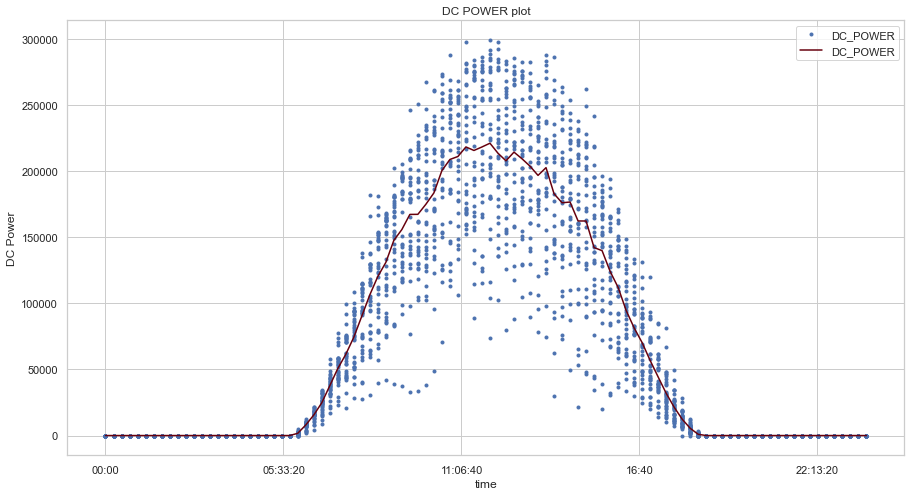

In [42]:
#plant1_data.iplot(x= 'time', y='DC_POWER', xTitle='Time',  yTitle= 'DC Power', title='DC POWER plot')
plant1_data.plot(x= 'time', y='DC_POWER', style='.', figsize = (15, 8))
plant1_data.groupby('time')['DC_POWER'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.ylabel('DC Power')
plt.title('DC POWER plot')
plt.show()